# Image Preprocessing for Corner and Shape Feature Extraction

This notebook focuses on preprocessing techniques applied to images
before corner and shape feature extraction.

Preprocessing improves image quality by reducing noise, enhancing
contrast, and simplifying pixel representation. These steps are
essential for accurate detection of corners and shapes in later stages.


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


In [15]:
image_files = [
    f for f in os.listdir(IMAGE_DIR)
    if f.lower().endswith(('.png', '.jpg', '.jpeg'))
]


(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

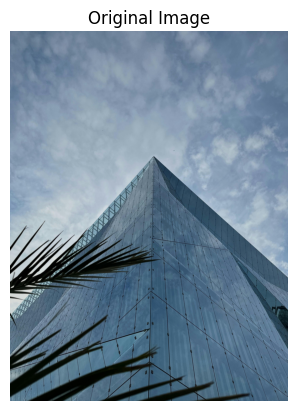

In [16]:
img_path = os.path.join(IMAGE_DIR, image_files[0])
image = cv2.imread(img_path)

# Convert BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")


## Grayscale Conversion

Grayscale conversion reduces a color image to a single intensity channel.
This simplifies computation and is sufficient for detecting edges,
corners, and shapes.

OpenCV converts RGB to grayscale using a weighted sum of color channels.


(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

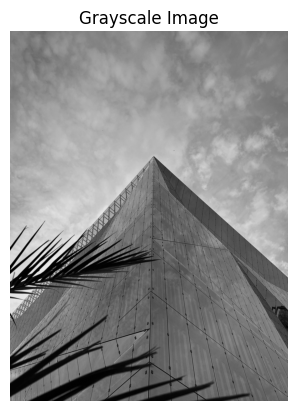

In [17]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")


## Noise Reduction

Noise introduces false edges and corners. Gaussian blurring smooths the
image by averaging pixel values, reducing high-frequency noise.


(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

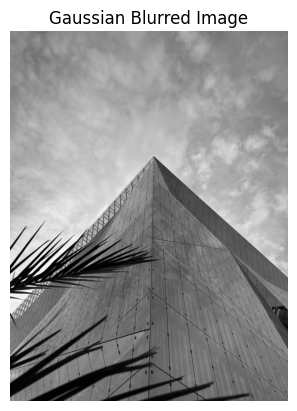

In [18]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(blur, cmap="gray")
plt.title("Gaussian Blurred Image")
plt.axis("off")


## Thresholding

Thresholding converts a grayscale image into a binary image. This
highlights object boundaries and simplifies shape detection.


(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

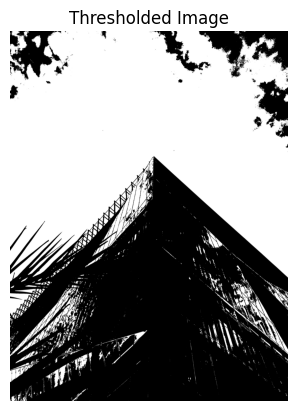

In [19]:
_, thresh = cv2.threshold(
    blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

plt.imshow(thresh, cmap="gray")
plt.title("Thresholded Image")
plt.axis("off")


## Image Normalization

Normalization scales pixel values to a standard range. This ensures
consistency across images taken under different lighting conditions.


(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

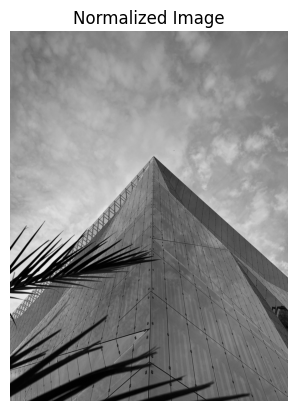

In [20]:
normalized = cv2.normalize(
    gray, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX
)

plt.imshow(normalized, cmap="gray")
plt.title("Normalized Image")
plt.axis("off")


In [21]:
def preprocess_image(img_path):
    img = cv2.imread(img_path)

    if img is None:
        print(f"Warning: Could not read image {img_path}")
        return None, None, None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(
        blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )

    return gray, blur, thresh


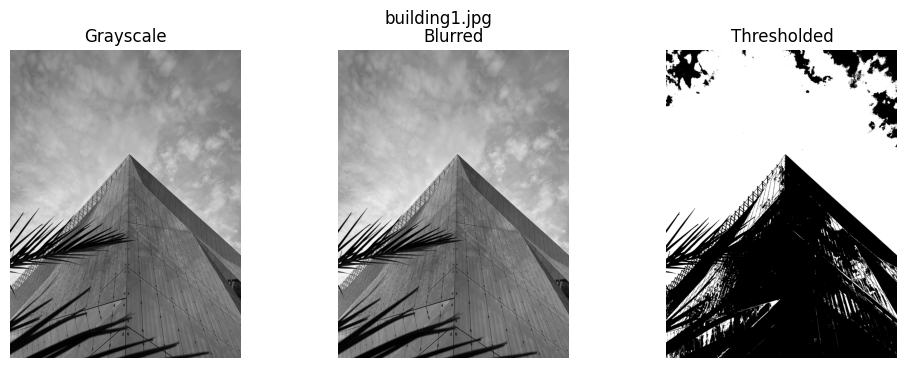

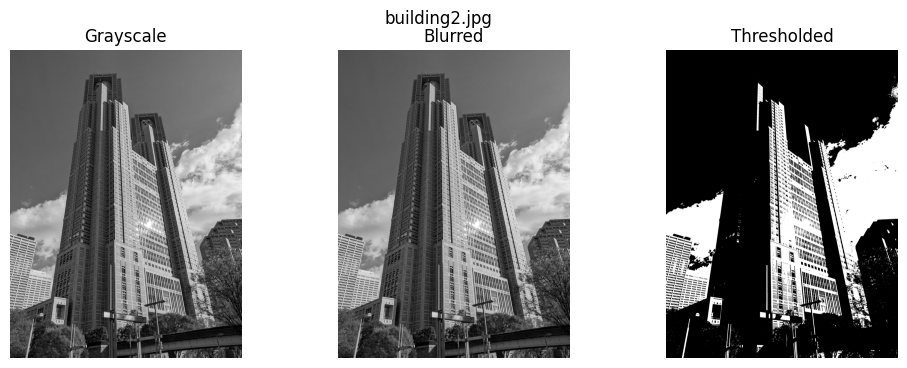

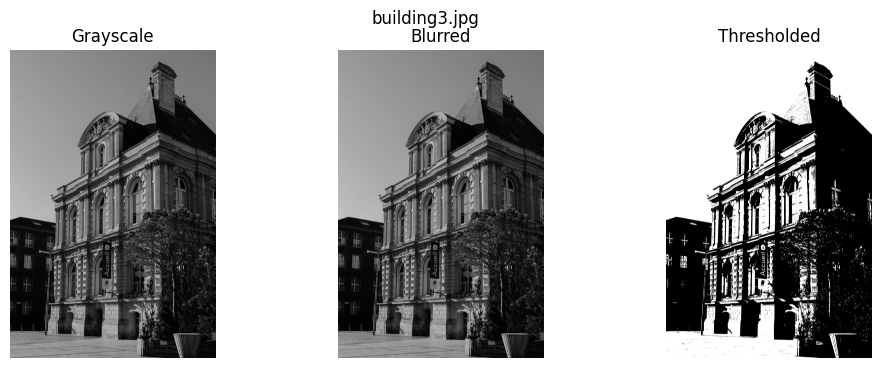

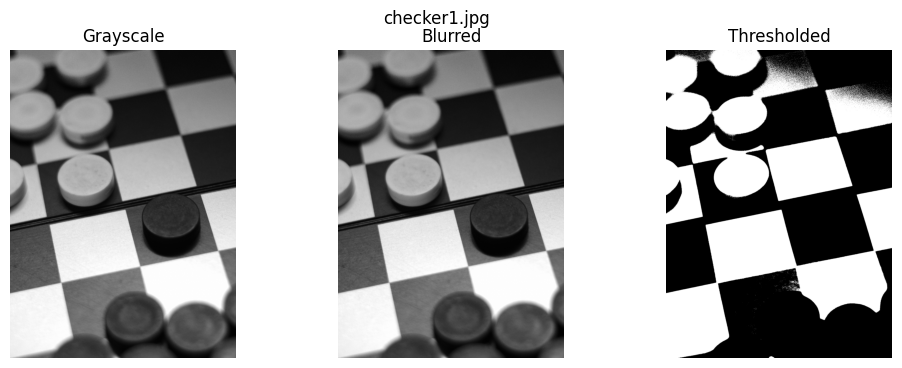

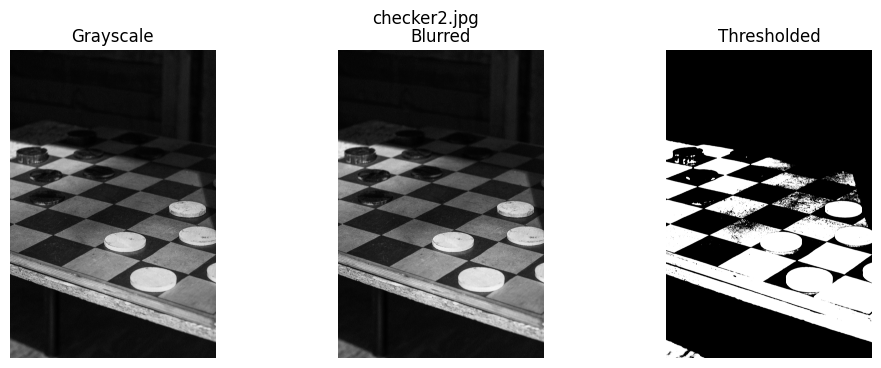

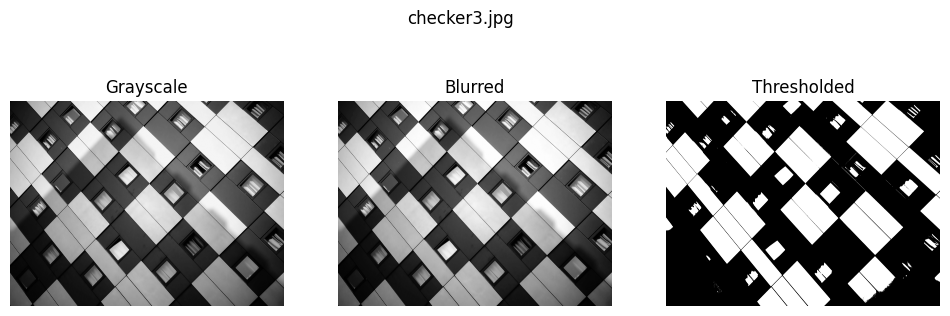

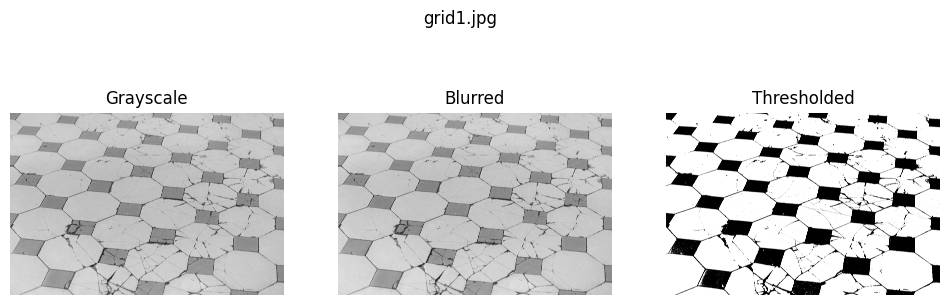

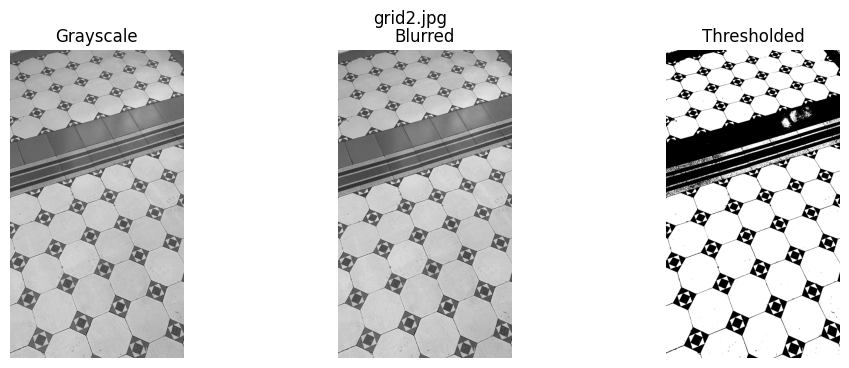

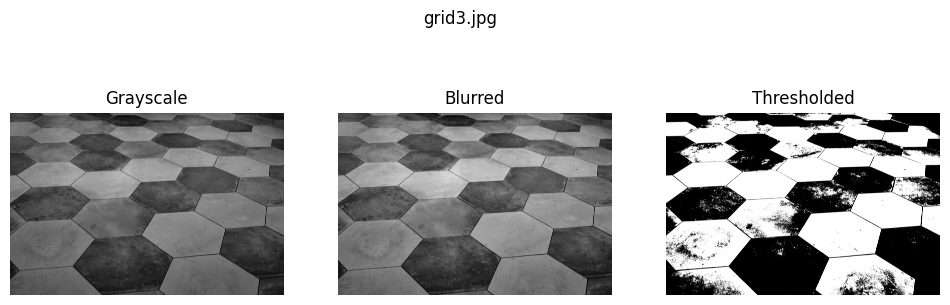

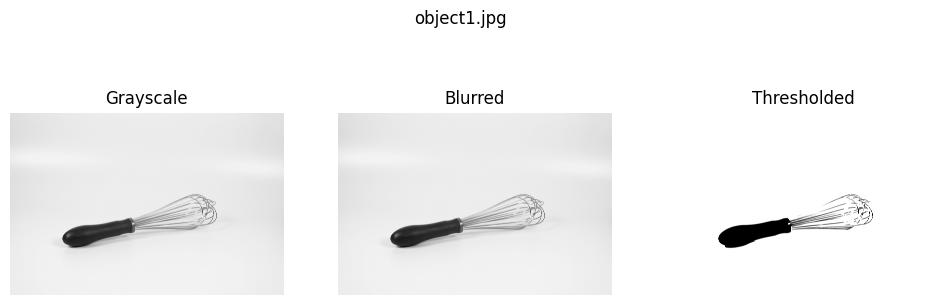

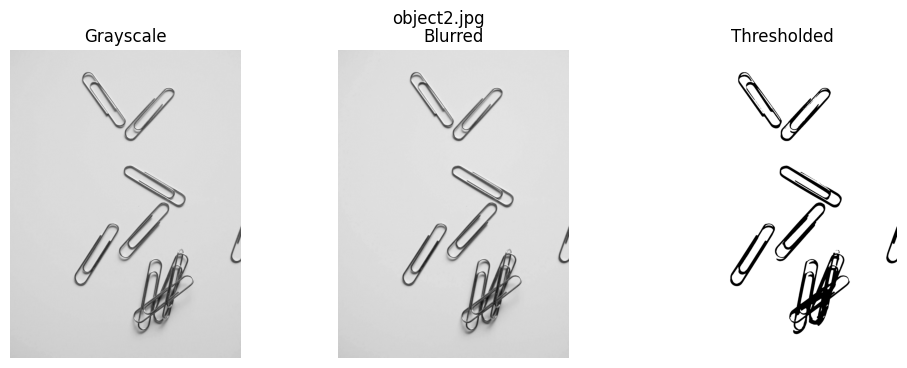

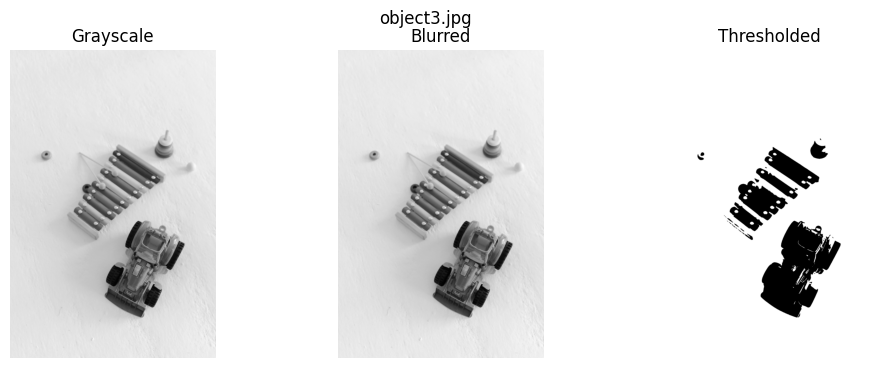

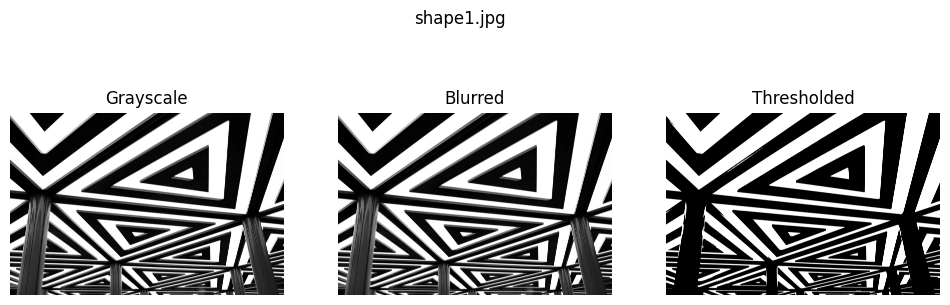

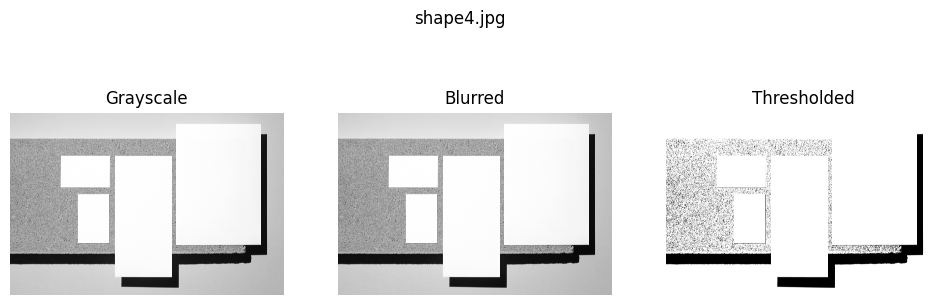

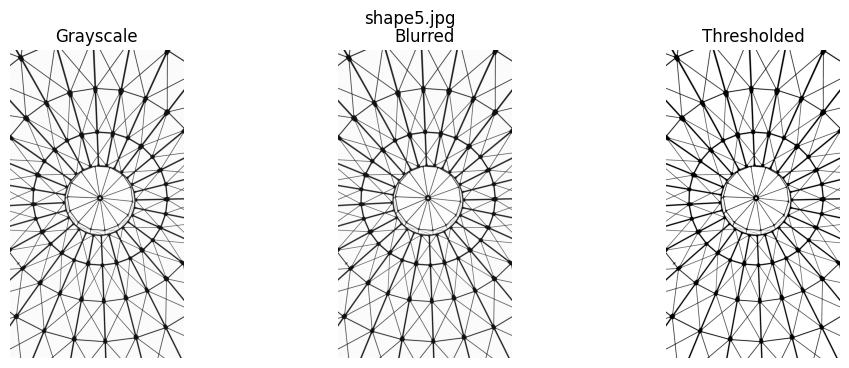

In [22]:
for file in image_files:
    path = os.path.join(IMAGE_DIR, file)
    gray, blur, thresh = preprocess_image(path)

    if gray is None:
        continue

    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.imshow(gray, cmap="gray")
    plt.title("Grayscale")
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.imshow(blur, cmap="gray")
    plt.title("Blurred")
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(thresh, cmap="gray")
    plt.title("Thresholded")
    plt.axis("off")

    plt.suptitle(file)
    plt.show()


## Results and Discussion

The preprocessing pipeline successfully reduces noise and enhances
structural features in the images. Grayscale conversion simplifies the
data, while Gaussian blurring removes unwanted noise. Thresholding
clearly highlights object boundaries, making the images suitable for
corner and shape feature extraction.


## Conclusion

This notebook implemented essential preprocessing techniques required
for corner and shape feature extraction. The processed images provide a
clean and standardized input for subsequent feature detection
algorithms such as Harris corners and contour-based shape detection.
